# KPI for invoice preparation time

# In brevi

TBD

# Data

The data file is available here (kpis.csv). It consists of a date column and six KPI data columns. Dates are entered using ISO 8601 date format (yyyy-mm-dd). The KPI columns are the number of commits per KPI.

In [1]:
# Import the required libraries and modules.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
invoicing = pd.read_csv('invoice_preparation_time.csv', parse_dates=True, index_col='Date')

In [3]:
invoicing['Start invoice'] = pd.to_datetime(invoicing['Start invoice'], format='%H:%M')
invoicing['Send invoice'] = pd.to_datetime(invoicing['Send invoice'], format='%H:%M')
invoicing['total_time'] = (invoicing['Send invoice'] - invoicing['Start invoice'])
invoicing['Total time'] = invoicing['total_time'] / np.timedelta64(1, 's')
invoicing = invoicing.drop(['total_time'], axis=1)

In [4]:
title = 'Invoicing cycle time'
subtitle = 'Start of invoice to invoice sent'
ylabel = 'Time (s)'
xlabel = 'Date'

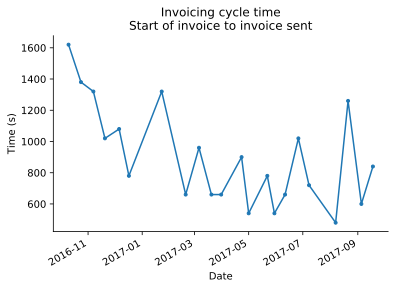

In [5]:
ax = invoicing['Total time'].plot.line(legend=False, marker='o', markersize=3)
ax.axis('auto')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
ax.set_title(title + '\n' + subtitle)
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)
ax.figure.savefig('invoice_cycle_time.svg', format='svg')
ax.figure.savefig('invoice_cycle_time.pdf', format='pdf')